In [6]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [9]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [13]:
address = '../datasets/mtcars.csv'

cars = pd.read_csv(address)
# cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
X = cars.ix[:, (1, 3, 4, 6)].values
y = cars.ix[:, (9)].values
cars.head()

C:\Users\wes_v\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\wes_v\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [25]:
print('X:\n', X[:5])
print('y:\n', y[:5])

X:
 [[ 21.    160.    110.      2.62 ]
 [ 21.    160.    110.      2.875]
 [ 22.8   108.     93.      2.32 ]
 [ 21.4   258.    110.      3.215]
 [ 18.7   360.    175.      3.44 ]]
y:
 [1 1 1 0 0]


## Using scipy to generte dendograms

In [24]:
# Z = generated clustering results from the scypi clustering algorithm:
Z = linkage(X, 'ward')
print('Z:\n', Z[:5])

Z: [[ 0.      1.      0.255   2.    ]
 [11.     12.      0.9621  2.    ]
 [ 9.     10.      1.4     2.    ]
 [13.     33.      1.9103  3.    ]
 [17.     25.      5.1157  2.    ]]


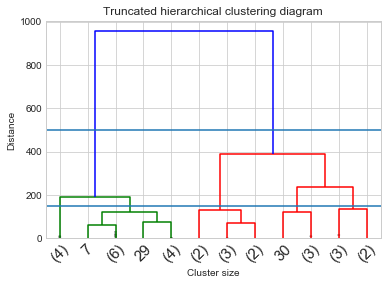

In [31]:
dendrogram(
    Z, 
    truncate_mode='lastp', 
    p=12, 
    leaf_rotation=45., 
    leaf_font_size=15., 
    show_contracted=True
)
plt.title('Truncated hierarchical clustering diagram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.axhline(y=500)
plt.axhline(y=150)

## Generating hierarchical clusters

In [34]:

############################ TODO: HOW TO DO THIS AUTOMATICLY? SET k to 2 BECAUSE OF THE max distance of 500 ##############

k = 2

Hclustering = AgglomerativeClustering(
    n_clusters=k,
    affinity='euclidean',
    linkage='ward'
)
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [35]:
Hclustering = AgglomerativeClustering(
    n_clusters=k,
    affinity='euclidean',
    linkage='complete'
)
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.4375

In [36]:
Hclustering = AgglomerativeClustering(
    n_clusters=k,
    affinity='euclidean',
    linkage='average'
)
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [39]:
Hclustering = AgglomerativeClustering(
    n_clusters=k,
    affinity='manhattan',
    linkage='average'
)
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.71875